## USERS에 대한 기본적인 EDA 
1. 로드 및 기본 정보: 데이터 크기, 컬럼, 처음 몇 행 확인
1. 타입 및 정보: dtypes, info() 확인
1. 결측치 분석: 결측치 개수/비율, 시각화 (바차트, 히트맵)
1. Age 분석: 통계, 이상치 분석 (IQR 방법)
1. Age 시각화: 히스토그램, 박스플롯, 연령대별 분포, 누적 분포
1. Location 분석: city/state/country 분리, Top 위치/국가/주/도시 통계
1. Location 시각화: Top 15 위치, Top 10 국가/주/도시 바차트
1. 국가별 나이 분석: Top 10 국가의 평균/중앙 나이, 사용자 수 비교
1. 요약 통계: 주요 지표 종합

### 로드 및 기본 정보: 데이터 크기, 컬럼, 처음 몇 행 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 스타일 설정
plt.style.use('default')
sns.set_palette("husl")

# 데이터 로드
data_path = Path('../../data/users.csv')
users = pd.read_csv(data_path)

print("=" * 80)
print("USERS DATASET - BASIC EDA")
print("=" * 80)
print(f"Total number of users: {len(users):,}")
print(f"Columns: {list(users.columns)}")

# 첫 몇 행 확인
users.head(10)

USERS DATASET - BASIC EDA
Total number of users: 68,092
Columns: ['user_id', 'location', 'age']


,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0
5,96054,"ottawa, ontario, canada",29.0
6,116866,"ottawa, ,",NaN
7,123629,"kingston, ontario, canada",NaN
8,177458,"ottawa, ontario, canada",29.0
9,200273,"comber, ontario, canada",NaN


### 타입 및 정보: dtypes, info() 확인

In [2]:
# 데이터 타입 및 기본 정보
print("Data types:")
print(users.dtypes)
print("\n" + "=" * 80)

users.info()

Data types:
user_id       int64
location     object
age         float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


### 결측치 분석: 결측치 개수/비율, 시각화 (바차트, 히트맵)

MISSING VALUES ANALYSIS
          Missing Count  Percentage
user_id               0     0.00000
location              0     0.00000
age               27833    40.87558


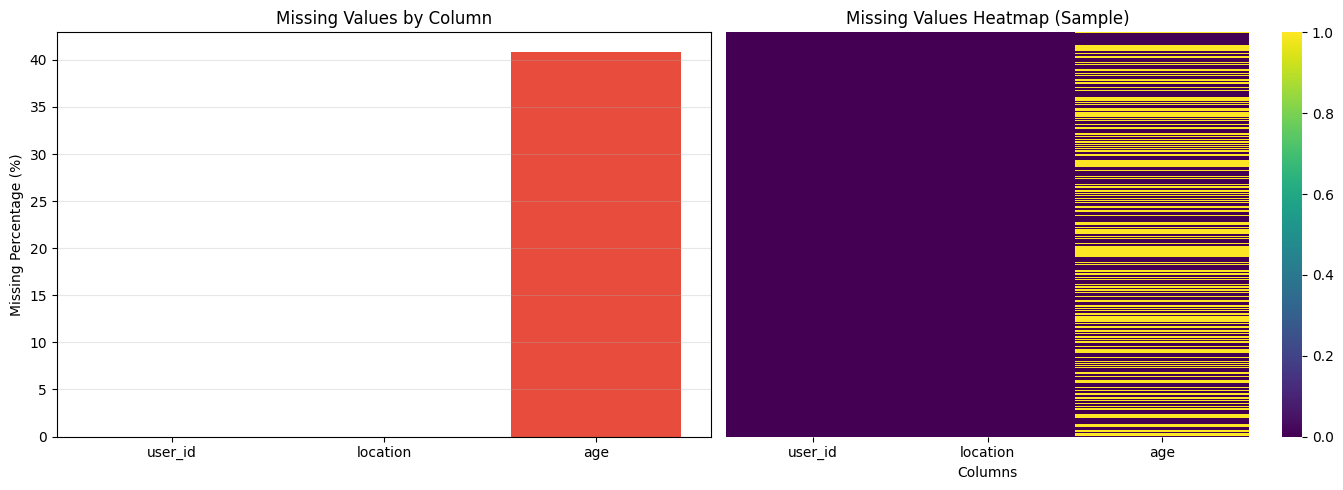

In [3]:
# 결측치 분석
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing = users.isnull().sum()
missing_pct = (users.isnull().sum() / len(users)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# 결측치 비율 바차트
ax[0].bar(missing_df.index, missing_df['Percentage'], color=['#2ecc71', '#3498db', '#e74c3c'])
ax[0].set_ylabel('Missing Percentage (%)')
ax[0].set_title('Missing Values by Column')
ax[0].grid(axis='y', alpha=0.3)

# 결측치 히트맵
sns.heatmap(users.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=ax[1])
ax[1].set_title('Missing Values Heatmap (Sample)')
ax[1].set_xlabel('Columns')

plt.tight_layout()
plt.show()

### Age 분석: 통계, 이상치 분석 (IQR 방법)

In [4]:
# Age 분석
print("=" * 80)
print("AGE ANALYSIS")
print("=" * 80)

print(f"Users with age info: {users['age'].notna().sum():,} ({users['age'].notna().sum()/len(users)*100:.2f}%)")
print(f"Users without age info: {users['age'].isna().sum():,} ({users['age'].isna().sum()/len(users)*100:.2f}%)")
print(f"\nAge statistics (non-null):")
print(users['age'].describe())

# 이상치 분석
Q1 = users['age'].quantile(0.25)
Q3 = users['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = users[(users['age'] < lower_bound) | (users['age'] > upper_bound)]

print(f"\nAge outliers (IQR method):")
print(f"  Number of outliers: {len(outliers):,} ({len(outliers)/len(users)*100:.2f}%)")
print(f"  Normal age range: [{lower_bound:.0f}, {upper_bound:.0f}]")
if len(outliers) > 0:
    print(f"  Outlier ages: {sorted(outliers['age'].dropna().unique())[:30]}")

AGE ANALYSIS
Users with age info: 40,259 (59.12%)
Users without age info: 27,833 (40.88%)

Age statistics (non-null):
count    40259.000000
mean        36.069873
std         13.842571
min          5.000000
25%         25.000000
50%         34.000000
75%         45.000000
max         99.000000
Name: age, dtype: float64

Age outliers (IQR method):
  Number of outliers: 163 (0.24%)
  Normal age range: [-5, 75]
  Outlier ages: [np.float64(76.0), np.float64(77.0), np.float64(78.0), np.float64(79.0), np.float64(80.0), np.float64(81.0), np.float64(82.0), np.float64(83.0), np.float64(84.0), np.float64(85.0), np.float64(86.0), np.float64(89.0), np.float64(90.0), np.float64(92.0), np.float64(93.0), np.float64(94.0), np.float64(96.0), np.float64(97.0), np.float64(98.0), np.float64(99.0)]


### Age 시각화: 히스토그램, 박스플롯, 연령대별 분포, 누적 분포

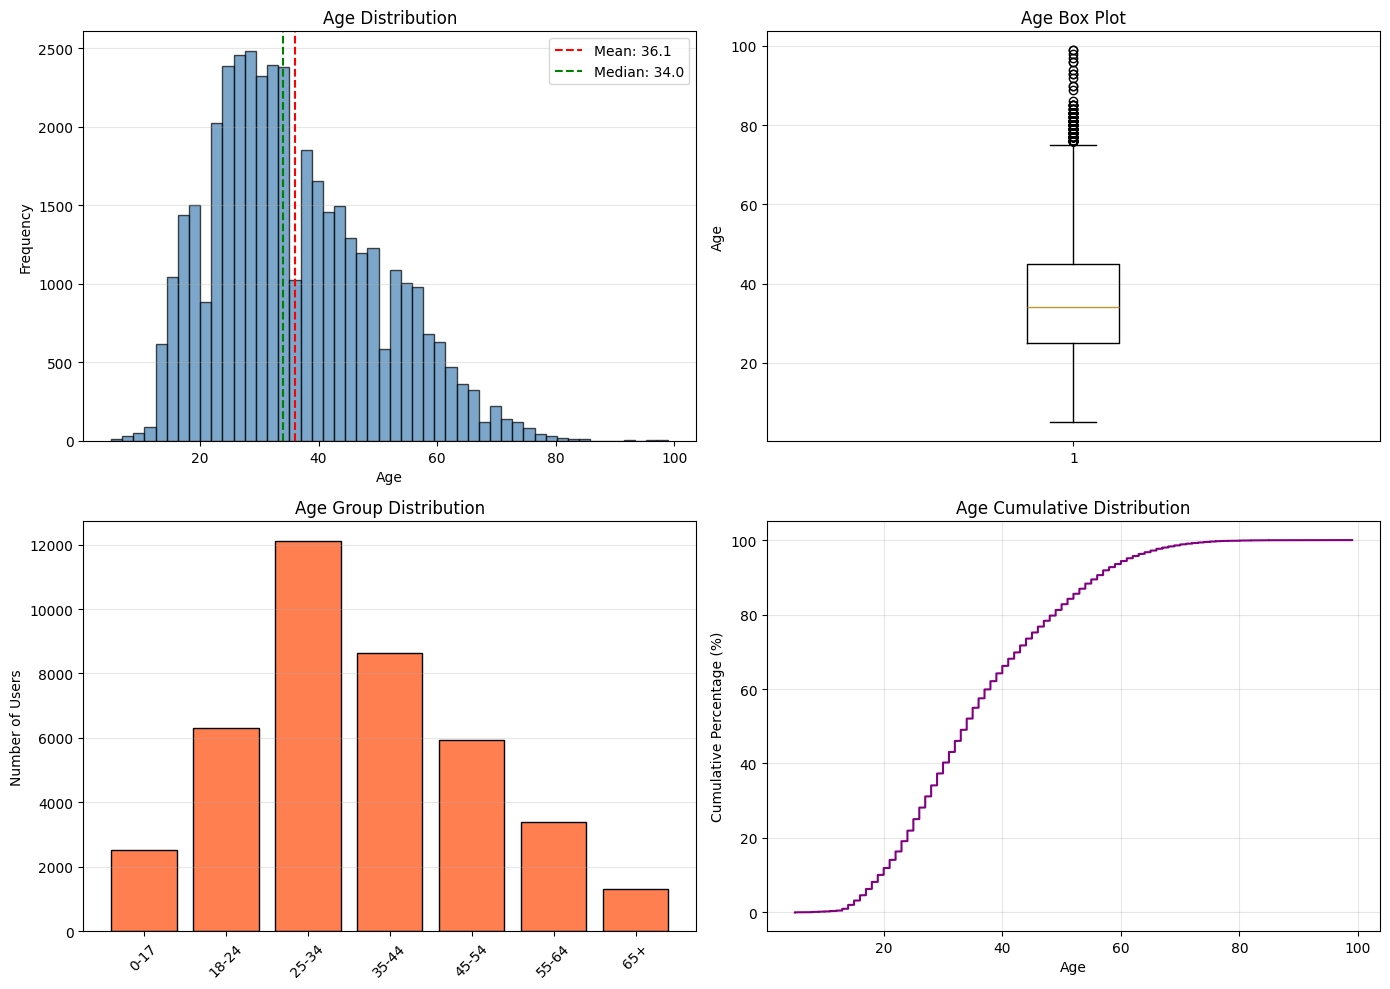

In [5]:
# Age 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age 분포 (히스토그램)
axes[0, 0].hist(users['age'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axvline(users['age'].mean(), color='red', linestyle='--', label=f'Mean: {users["age"].mean():.1f}')
axes[0, 0].axvline(users['age'].median(), color='green', linestyle='--', label=f'Median: {users["age"].median():.1f}')
axes[0, 0].legend()

# Age 박스플롯
axes[0, 1].boxplot(users['age'].dropna(), vert=True)
axes[0, 1].set_ylabel('Age')
axes[0, 1].set_title('Age Box Plot')
axes[0, 1].grid(axis='y', alpha=0.3)

# Age 그룹별 분포
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
users['age_group'] = pd.cut(users['age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = users['age_group'].value_counts().sort_index()

axes[1, 0].bar(range(len(age_group_counts)), age_group_counts.values, color='coral', edgecolor='black')
axes[1, 0].set_xticks(range(len(age_group_counts)))
axes[1, 0].set_xticklabels(age_group_counts.index, rotation=45)
axes[1, 0].set_ylabel('Number of Users')
axes[1, 0].set_title('Age Group Distribution')
axes[1, 0].grid(axis='y', alpha=0.3)

# Age 누적 분포
sorted_ages = users['age'].dropna().sort_values()
cumulative = np.arange(1, len(sorted_ages) + 1) / len(sorted_ages) * 100
axes[1, 1].plot(sorted_ages, cumulative, color='purple')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Cumulative Percentage (%)')
axes[1, 1].set_title('Age Cumulative Distribution')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Location 분석: city/state/country 분리, Top 위치/국가/주/도시 통계

In [6]:
# Location 분석
print("=" * 80)
print("LOCATION ANALYSIS")
print("=" * 80)

# location을 city, state, country로 분리
location_split = users['location'].str.split(',', expand=True, n=2)
location_split.columns = ['city', 'state', 'country']
location_split = location_split.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

print(f"Unique locations: {users['location'].nunique():,}")

# n/a 값 분석
na_location = users[users['location'].str.contains('n/a', case=False, na=False)]
print(f"Users with 'n/a' in location: {len(na_location):,} ({len(na_location)/len(users)*100:.2f}%)")

print(f"\nTop 15 locations:")
print(users['location'].value_counts().head(15))

print(f"\nTop 10 countries:")
print(location_split['country'].value_counts().head(10))

print(f"\nTop 10 states:")
print(location_split['state'].value_counts().head(10))

print(f"\nTop 10 cities:")
print(location_split['city'].value_counts().head(10))

LOCATION ANALYSIS
Unique locations: 18,368
Users with 'n/a' in location: 1,463 (2.15%)

Top 15 locations:
location
toronto, ontario, canada               616
portland, oregon, usa                  540
seattle, washington, usa               536
chicago, illinois, usa                 503
san francisco, california, usa         456
vancouver, british columbia, canada    428
san diego, california, usa             426
new york, new york, usa                416
london, england, united kingdom        412
houston, texas, usa                    387
ottawa, ontario, canada                381
calgary, alberta, canada               346
austin, texas, usa                     326
los angeles, california, usa           306
melbourne, victoria, australia         263
Name: count, dtype: int64

Top 10 countries:
country
usa               43988
canada             6208
germany            3526
united kingdom     2914
                   2090
australia          1790
spain              1653
france             

### Location 시각화: Top 15 위치, Top 10 국가/주/도시 바차트

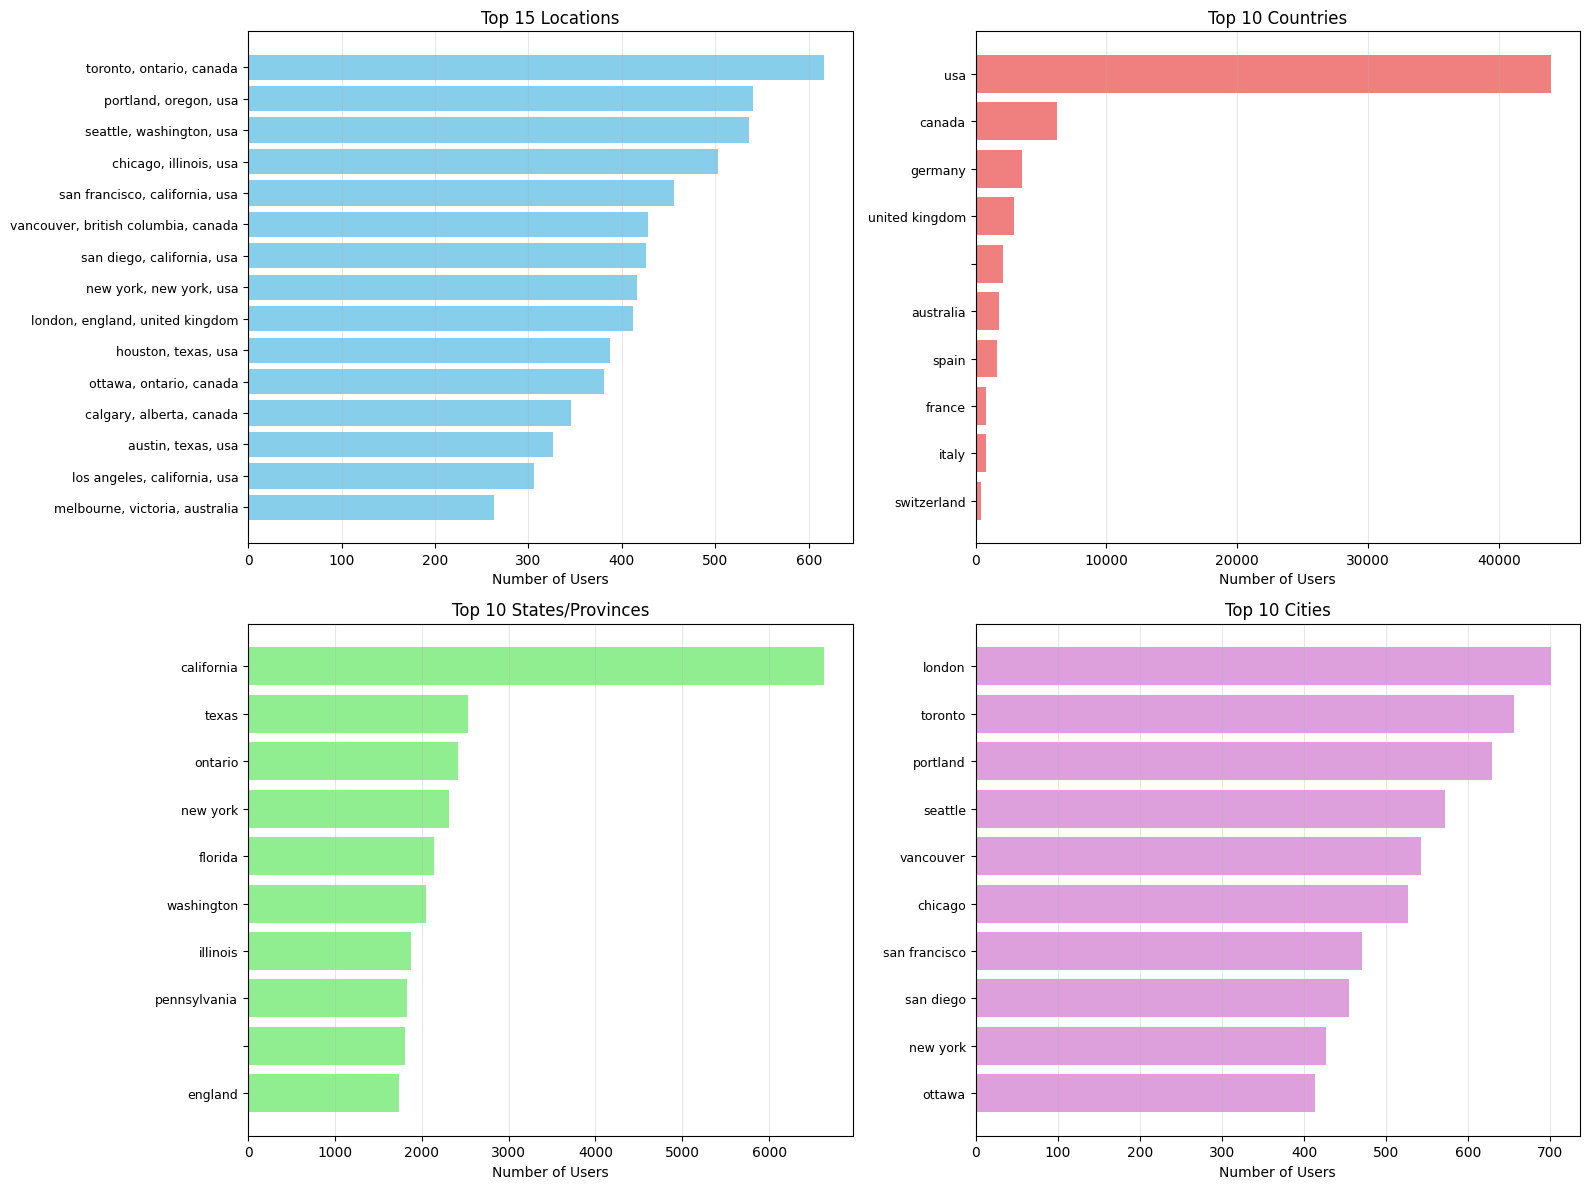

In [7]:
# Location 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 전체 위치
top_locations = users['location'].value_counts().head(15)
axes[0, 0].barh(range(len(top_locations)), top_locations.values, color='skyblue')
axes[0, 0].set_yticks(range(len(top_locations)))
axes[0, 0].set_yticklabels(top_locations.index, fontsize=9)
axes[0, 0].set_xlabel('Number of Users')
axes[0, 0].set_title('Top 15 Locations')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].invert_yaxis()

# Top 10 국가
top_countries = location_split['country'].value_counts().head(10)
axes[0, 1].barh(range(len(top_countries)), top_countries.values, color='lightcoral')
axes[0, 1].set_yticks(range(len(top_countries)))
axes[0, 1].set_yticklabels(top_countries.index, fontsize=9)
axes[0, 1].set_xlabel('Number of Users')
axes[0, 1].set_title('Top 10 Countries')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# Top 10 주/도
top_states = location_split['state'].value_counts().head(10)
axes[1, 0].barh(range(len(top_states)), top_states.values, color='lightgreen')
axes[1, 0].set_yticks(range(len(top_states)))
axes[1, 0].set_yticklabels(top_states.index, fontsize=9)
axes[1, 0].set_xlabel('Number of Users')
axes[1, 0].set_title('Top 10 States/Provinces')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# Top 10 도시
top_cities = location_split['city'].value_counts().head(10)
axes[1, 1].barh(range(len(top_cities)), top_cities.values, color='plum')
axes[1, 1].set_yticks(range(len(top_cities)))
axes[1, 1].set_yticklabels(top_cities.index, fontsize=9)
axes[1, 1].set_xlabel('Number of Users')
axes[1, 1].set_title('Top 10 Cities')
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

### 국가별 나이 분석: Top 10 국가의 평균/중앙 나이, 사용자 수 비교

AGE BY COUNTRY ANALYSIS
       Country  Total Users  Users with Age   Avg Age  Median Age
           usa        43988           24524 37.842399        36.0
        canada         6208            3248 35.550800        33.0
       germany         3526            2454 31.508557        30.0
united kingdom         2914            2110 34.123223        32.0
                       2090             843 36.831554        34.0
     australia         1790            1330 34.575188        32.0
         spain         1653            1553 30.800386        29.0
        france          794             706 30.092068        28.0
         italy          770             471 32.220807        31.0
   switzerland          451             310 34.206452        32.0


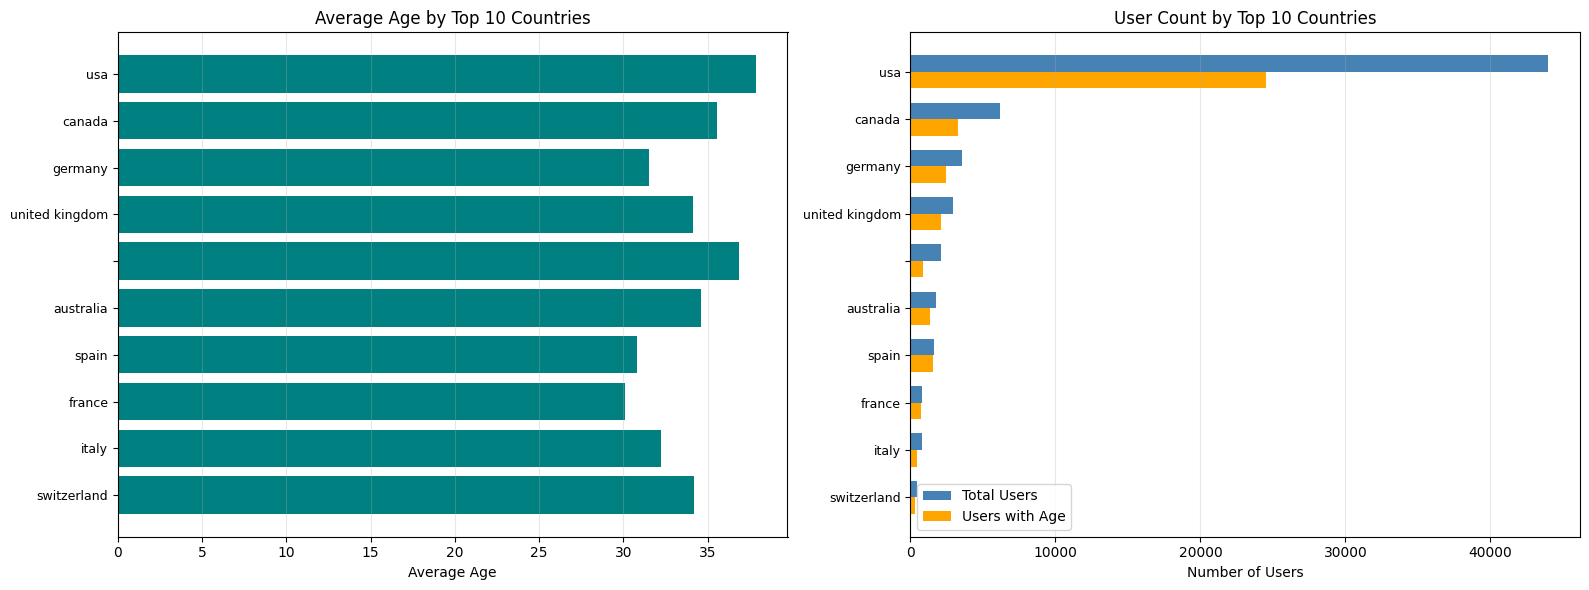

In [8]:
# 국가별 평균 나이 분석
print("=" * 80)
print("AGE BY COUNTRY ANALYSIS")
print("=" * 80)

users_with_country = users.copy()
users_with_country['country'] = location_split['country']

# Top 10 국가별 평균 나이
top_10_countries = location_split['country'].value_counts().head(10).index
country_age_stats = []

for country in top_10_countries:
    country_users = users_with_country[users_with_country['country'] == country]
    avg_age = country_users['age'].mean()
    median_age = country_users['age'].median()
    total_users = len(country_users)
    users_with_age = country_users['age'].notna().sum()
    
    country_age_stats.append({
        'Country': country,
        'Total Users': total_users,
        'Users with Age': users_with_age,
        'Avg Age': avg_age,
        'Median Age': median_age
    })

country_age_df = pd.DataFrame(country_age_stats)
print(country_age_df.to_string(index=False))

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 국가별 평균 나이
axes[0].barh(range(len(country_age_df)), country_age_df['Avg Age'], color='teal')
axes[0].set_yticks(range(len(country_age_df)))
axes[0].set_yticklabels(country_age_df['Country'], fontsize=9)
axes[0].set_xlabel('Average Age')
axes[0].set_title('Average Age by Top 10 Countries')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# 국가별 사용자 수 및 나이 정보 비율
x = np.arange(len(country_age_df))
width = 0.35

axes[1].barh(x - width/2, country_age_df['Total Users'], width, label='Total Users', color='steelblue')
axes[1].barh(x + width/2, country_age_df['Users with Age'], width, label='Users with Age', color='orange')
axes[1].set_yticks(x)
axes[1].set_yticklabels(country_age_df['Country'], fontsize=9)
axes[1].set_xlabel('Number of Users')
axes[1].set_title('User Count by Top 10 Countries')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### 요약 통계: 주요 지표 종합

In [9]:
# 요약 통계
print("=" * 80)
print("SUMMARY")
print("=" * 80)

summary = {
    'Total Users': len(users),
    'Unique Locations': users['location'].nunique(),
    'Users with Age': users['age'].notna().sum(),
    'Age Coverage (%)': f"{users['age'].notna().sum()/len(users)*100:.2f}%",
    'Average Age': f"{users['age'].mean():.2f}",
    'Median Age': f"{users['age'].median():.2f}",
    'Age Range': f"{users['age'].min():.0f} - {users['age'].max():.0f}",
    'Most Common Country': location_split['country'].value_counts().index[0],
    'Most Common Location': users['location'].value_counts().index[0],
    'N/A Locations': len(na_location)
}

for key, value in summary.items():
    print(f"{key:.<40} {value}")

print("=" * 80)

SUMMARY
Total Users............................. 68092
Unique Locations........................ 18368
Users with Age.......................... 40259
Age Coverage (%)........................ 59.12%
Average Age............................. 36.07
Median Age.............................. 34.00
Age Range............................... 5 - 99
Most Common Country..................... usa
Most Common Location.................... toronto, ontario, canada
N/A Locations........................... 1463
